In [1]:
!pip install scikit-ntk

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout,Activation,BatchNormalization
from keras.models import Sequential
from skntk import NeuralTangentKernel as NTK
import tensorflow.signal as tfs
import tensorflow as tf
import keras
print("all the libraries are imported")

all the libraries are imported


In [3]:
X_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels_test.csv', delimiter = ',')

In [4]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [7]:
import random

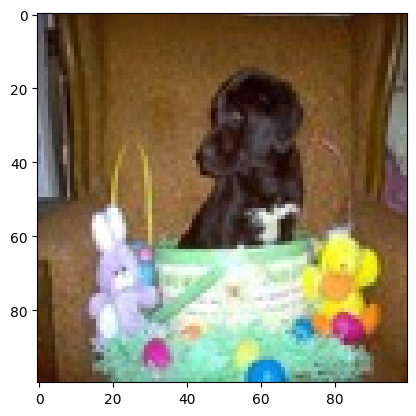

In [8]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [22]:
resize_rescale=keras.Sequential([
    keras.layers.Resizing(100,100),
    keras.layers.Rescaling(1./255)
])

In [23]:
data_augmentation=keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
])

In [ ]:
model_small=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPool2D(2,2),

    Flatten(),

    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')
])


In [ ]:
model_small.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [24]:
with tf.device('/GPU:0'):
  model_small=Sequential([
    resize_rescale,
    data_augmentation,
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPool2D(2,2),

    Flatten(),

    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')
])
  model_small.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  model_small.fit(X_train,Y_train,epochs=150,batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4968 - loss: 0.6938
Epoch 2/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5074 - loss: 0.6931
Epoch 3/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4700 - loss: 0.6932
Epoch 4/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5008 - loss: 0.6932
Epoch 5/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4925 - loss: 0.6932
Epoch 6/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4784 - loss: 0.6932
Epoch 7/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4820 - loss: 0.6932
Epoch 8/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5151 - loss: 0.6932
Epoch 9/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4744 - loss: 0.6932
Epoch 10/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4951 - loss: 0.6932
Epoch 11/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5122 - loss: 0.6932
Epoch 12/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

In [25]:
with tf.device('/GPU:0'):
    def fourier(inp=None):
      if inp==None:
          pass
      elif(inp!=None):
          return tfs.fft3d(inp)
    def ntk(inp=None):
      if(inp==None):
          pass
      elif(inp!=None):
          n = NTK(depth=3, bias=0.01, bias_bounds=(1e-5, 1e5))
          return n
    model_big=Sequential([
      resize_rescale,
      data_augmentation,
      Conv2D(32,(3,3),activation=ntk(),input_shape=(100,100,3)),
      MaxPool2D(2,2),

      Flatten(),

      Dense(128,activation=fourier()),
      Dense(1,activation='sigmoid')
    ])
    model_big.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    model_big.fit(X_train,Y_train,epochs=150,batch_size=32)

Epoch 1/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4904 - loss: 0.7105
Epoch 2/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5259 - loss: 0.6948
Epoch 3/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5307 - loss: 0.6909
Epoch 4/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4911 - loss: 0.7063
Epoch 5/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5260 - loss: 0.6918
Epoch 6/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5347 - loss: 0.6897
Epoch 7/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5416 - loss: 0.6884
Epoch 8/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5453 - loss: 0.6865
Epoch 9/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5429 - loss: 0.6891
Epoch 10/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5476 - loss: 0.6904
Epoch 11/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5395 - loss: 0.6884
Epoch 12/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

In [26]:
accuracy_small=model_small.evaluate(X_test, Y_test)
print(accuracy_small)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2084 - loss: 0.6935
[0.6931473612785339, 0.5]


In [27]:
accuracy_big=model_big.evaluate(X_test, Y_test)
print(accuracy_big)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6996 - loss: 0.6248
[0.6598148345947266, 0.637499988079071]


In [29]:
accuracy_small = accuracy_small[0]
accuracy_big = accuracy_big[0]
percentage_difference = abs(accuracy_big - accuracy_small) / accuracy_big * 100
print(f"Percentage difference in accuracy: {percentage_difference:.2f}%")

Percentage difference in accuracy: 5.05%
